In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
df = pd.read_csv("/Users/shanthakumark/Downloads/loan_data.csv")

cf = pd.read_csv("/Users/shanthakumark/Downloads/loan_data.csv")

dd = pd.read_csv("/Users/shanthakumark/Downloads/data_dictionary.csv")

In [3]:
# df.head()



# for col in df.columns:
#     print(f"\n{df[col].value_counts()}\n_____________________________________")

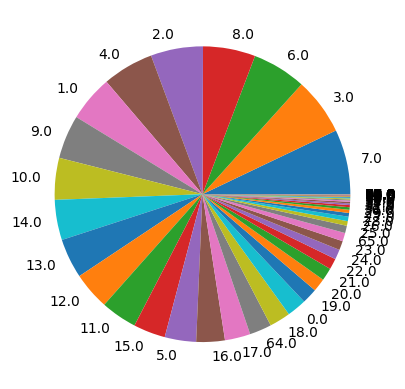

In [3]:
pd.set_option('display.max_rows',None)
plt.pie(df['OWN_CAR_AGE'].value_counts(normalize=True),labels=df['OWN_CAR_AGE'].value_counts(normalize=True).index)
plt.show()

# NULL TREATMENT AS PER VARIABLE DATA TYPE

null_values = []
for col_name,null_count in zip(df.isnull().sum().index,df.isnull().sum().values):
    if null_count > 0:
        null_values.append(col_name)

# df[null_values].isnull().sum()

numerical_cols = df[null_values].select_dtypes(["float64"]).columns

cat_cols = df[null_values].select_dtypes(['object']).columns

In [4]:
# plt.figure(figsize = (17,200))
# sns.boxplot(df[numerical_cols],orient = "h")
# plt.show()

median_treatment = ["AMT_ANNUITY_x","AMT_GOODS_PRICE_x","AMT_ANNUITY_y","AMT_CREDIT_y","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE_y"]

for col_name in median_treatment:
    df[col_name] = df[col_name].fillna(df[col_name].median())

copy_num_col = numerical_cols.copy()

rest_num_cols = [col_n for col_n in copy_num_col if col_n not in median_treatment]

# plt.figure(figsize = (17,200))
# sns.boxplot(df[rest_num_cols],orient = "h")
# plt.show()

In [5]:
df[rest_num_cols].columns

mode_filler = ["OWN_CAR_AGE","FLOORSMAX_MODE","FLOORSMIN_MODE","NFLAG_INSURED_ON_APPROVAL","CNT_PAYMENT","RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR","DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","FLOORSMIN_MEDI","ENTRANCES_MODE","ELEVATORS_MODE"]

for i in mode_filler:
    df[i] = df[i].fillna(df[i].mode()[0])

col_y_treated = [col for col in rest_num_cols if col not in mode_filler]

for i in col_y_treated:
    df[i] = df[i].fillna(df[i].mean())

for cat_ in cat_cols:
    df[cat_] = df[cat_].fillna(df[cat_].mode()[0])

pd.set_option('display.max_rows',None)
df.isnull().sum()

product_comb = df['PRODUCT_COMBINATION'].unique()

data = df.copy()

In [6]:
# plt.figure(figsize = (117,37))
# sns.lineplot(x = (data.select_dtypes(["float64","int64"]) < 0).sum().index,y = (data.select_dtypes(["float64","int64"]) < 0).sum().values)
# plt.show()

neg_val = []
for i,j in zip((data.select_dtypes(["float64","int64"]) < 0).sum().index,(data.select_dtypes(["float64","int64"]) < 0).sum().values):
    if j > 0:
        neg_val.append(i)

data[neg_val] = data[neg_val].abs

# AFTER TREATMENT

# plt.figure(figsize = (117,37))
# sns.barplot(x = (data.select_dtypes(["float64","int64"]) < 0).sum().index,y = (data.select_dtypes(["float64","int64"]) < 0).sum().values)
# plt.show()

# OUTLIER TREATMENT

# plt.figure(figsize = (7,107))
# sns.boxplot(data,orient = "h")
# plt.show()

# for i in data.select_dtypes(['float64','int64']).columns:
#     print(f" BOX PLOT OF {i} :")
#     plt.figure(figsize = (7,3))
#     sns.boxplot(data[i],orient = 'h')
#     print("______________________________")
#     plt.show()

cols_w_outlier = ["CNT_PAYMENT","RATE_INTEREST_PRIVILEGED","RATE_INTEREST_PRIMARY","AMT_GOODS_PRICE_y","AMT_CREDIT_y","AMT_APPLICATION","AMT_ANNUITY_y","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR","DEF_60_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","TOTALAREA_MODE","NONLIVINGAREA_MEDI","NONLIVINGAPARTMENTS_MEDI","LIVINGAREA_MEDI","LIVINGAPARTMENTS_MEDI","LANDAREA_MEDI","FLOORSMAX_MEDI","ENTRANCES_MEDI","ELEVATORS_MEDI","COMMONAREA_MEDI","YEARS_BEGINEXPLUATATION_MEDI","APARTMENTS_MEDI","NONLIVINGAREA_MODE","NONLIVINGAPARTMENTS_MODE","LIVINGAPARTMENTS_MODE","YEARS_BEGINEXPLUATATION_MODE","LIVINGAREA_AVG","NONLIVINGAPARTMENTS_AVG","ELEVATORS_AVG","ENTRANCES_AVG","FLOORSMAX_AVG","FLOORSMIN_AVG","HOUR_APPR_PROCESS_START_x","CNT_FAM_MEMBERS","AMT_GOODS_PRICE_x","AMT_ANNUITY_x","AMT_CREDIT_x","AMT_INCOME_TOTAL"]



# plt.figure(figsize = (17,77))
# sns.boxplot(df[cols_w_outlier],orient='h')
# plt.show()

def outlier_treatment(data, columns):
    # Calculate the quantiles and IQR for each column in a vectorized manner
    q1 = data[columns].quantile(0.25)
    q3 = data[columns].quantile(0.75)
    iqr = q3 - q1
    ll = q1 - 1.5 * iqr
    ul = q3 + 1.5 * iqr
    
    # Clip the outliers in the entire dataframe at once
    data[columns] = data[columns].clip(lower=ll, upper=ul, axis=1)
    
    return data

data = outlier_treatment(data, cols_w_outlier)

first_copy = data.copy()

In [8]:
# with open("/Users/shanthakumark/Desktop/Sharing/Final_project/pickle_files/first_copy.pkl","wb") as fp:
#     pickle.dump(first_copy,fp)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

Oe = OrdinalEncoder()

cat_cols = data.select_dtypes("object").columns

Oe.fit(data[cat_cols])

OrdinalEncoder()

In [8]:
data[cat_cols] = Oe.fit_transform(data[cat_cols])

data.dtypes

product_combination_dictionary = dict(zip(data['PRODUCT_COMBINATION'].unique(),product_comb))

# EXPLORATORY DATA ANALYSIS

f_data = data.copy()

f_data.head()

# with open("/Users/shanthakumark/Desktop/Sharing/Final_project/pickle_files/f_data.pkl","wb") as fd:
#     pickle.dump(f_data,fd)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0.0          1.0           0.0   
1      100003       0                   0.0          0.0           0.0   
2      100003       0                   0.0          0.0           0.0   
3      100003       0                   0.0          0.0           0.0   
4      100004       0                   1.0          1.0           1.0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0              1.0             0          202500.0      406597.5   
1              0.0             0          270000.0     1293502.5   
2              0.0             0          270000.0     1293502.5   
3              0.0             0          270000.0     1293502.5   
4              1.0             0           67500.0      135000.0   

   AMT_ANNUITY_x  ...  NAME_SELLER_INDUSTRY  CNT_PAYMENT  NAME_YIELD_GROUP  \
0        24700.5  ...                   0.0         24.0               3.0   
1        35698.5  ...                  10.0         12.0               3.0   
2        35698.5  ...                   5.0          6.0               4.0   
3        35698.5  ...                   4.0         12.0               4.0   
4         6750.0  ...                   2.0          4.0               4.0   

   PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
0                 15.0                 0.0             0.0   
1                  7.0                 0.0             0.0   
2                 11.0                 0.0             0.0   
3                  9.0                 0.0             0.0   
4                 14.0                 0.0             0.0   

   DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0                        0.0            0.0               0.0   
1                        0.0            0.0               0.0   
2                        0.0            0.0               0.0   
3                        0.0            0.0               0.0   
4                        0.0            0.0               0.0   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        0.0  
3                        1.0  
4                        0.0  

[5 rows x 158 columns]

/var/folders/8s/s0p6c0q17874v0sx52kt914h0000gn/T/ipykernel_10578/1687337702.py:1: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'red'}` instead.

  sns.barplot(x = f_data['TARGET'].value_counts().index, y = f_data['TARGET'].value_counts().values,width = 0.3,errcolor = 'red')


<Axes: xlabel='TARGET'>

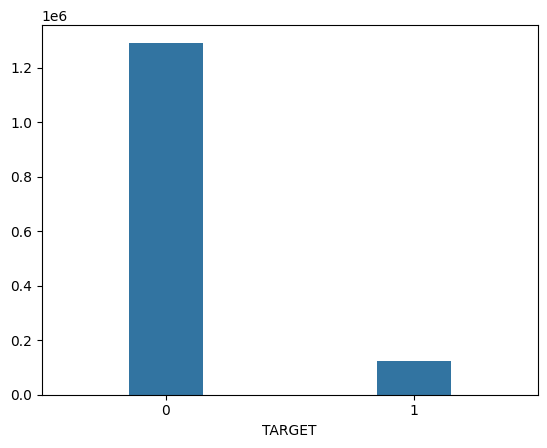

In [11]:
sns.barplot(x = f_data['TARGET'].value_counts().index, y = f_data['TARGET'].value_counts().values,width = 0.3,errcolor = 'red')

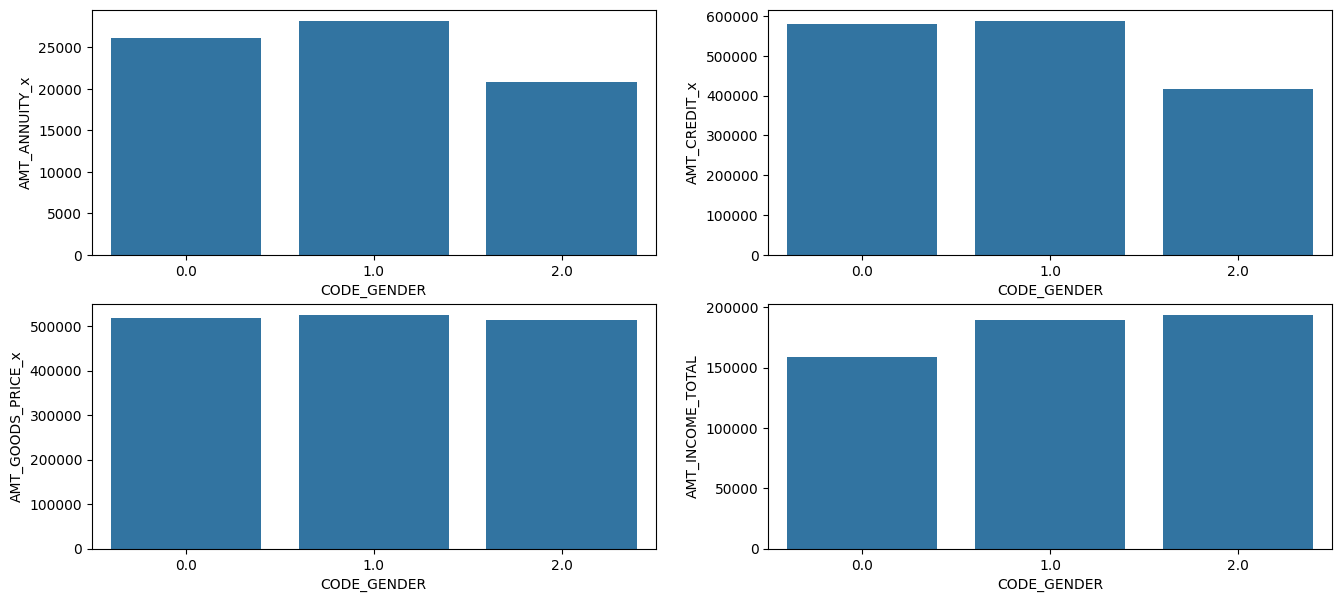

RESULT SHOWING GENDER 1.0 WHICH IS MALE HAS HIGHER DOMINATION IN AMT


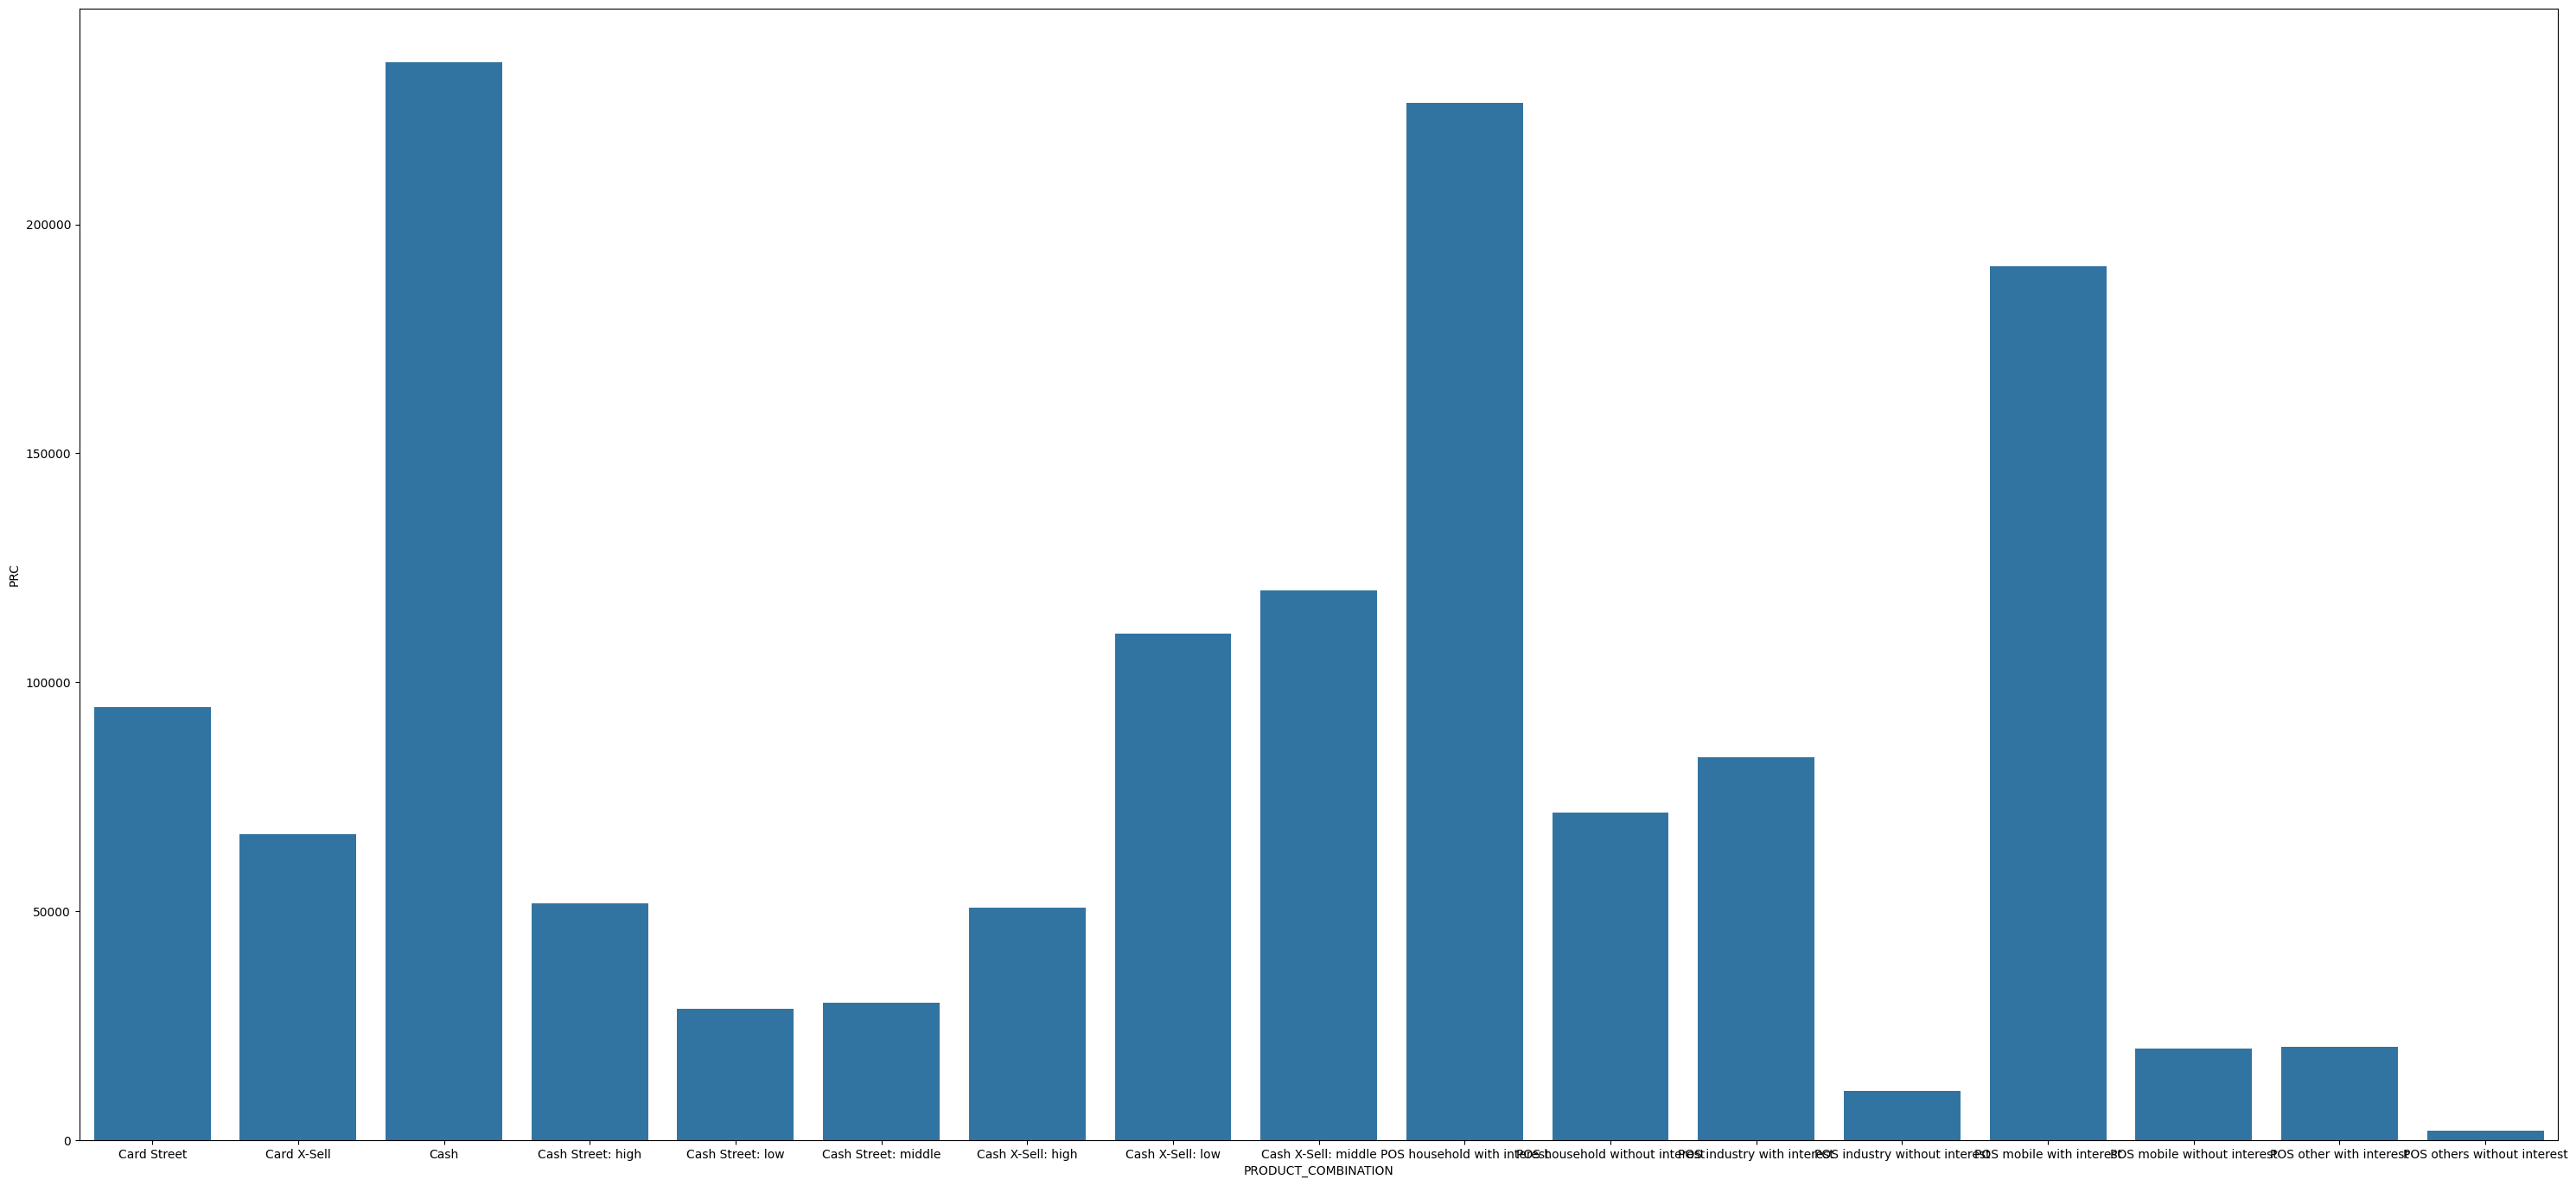

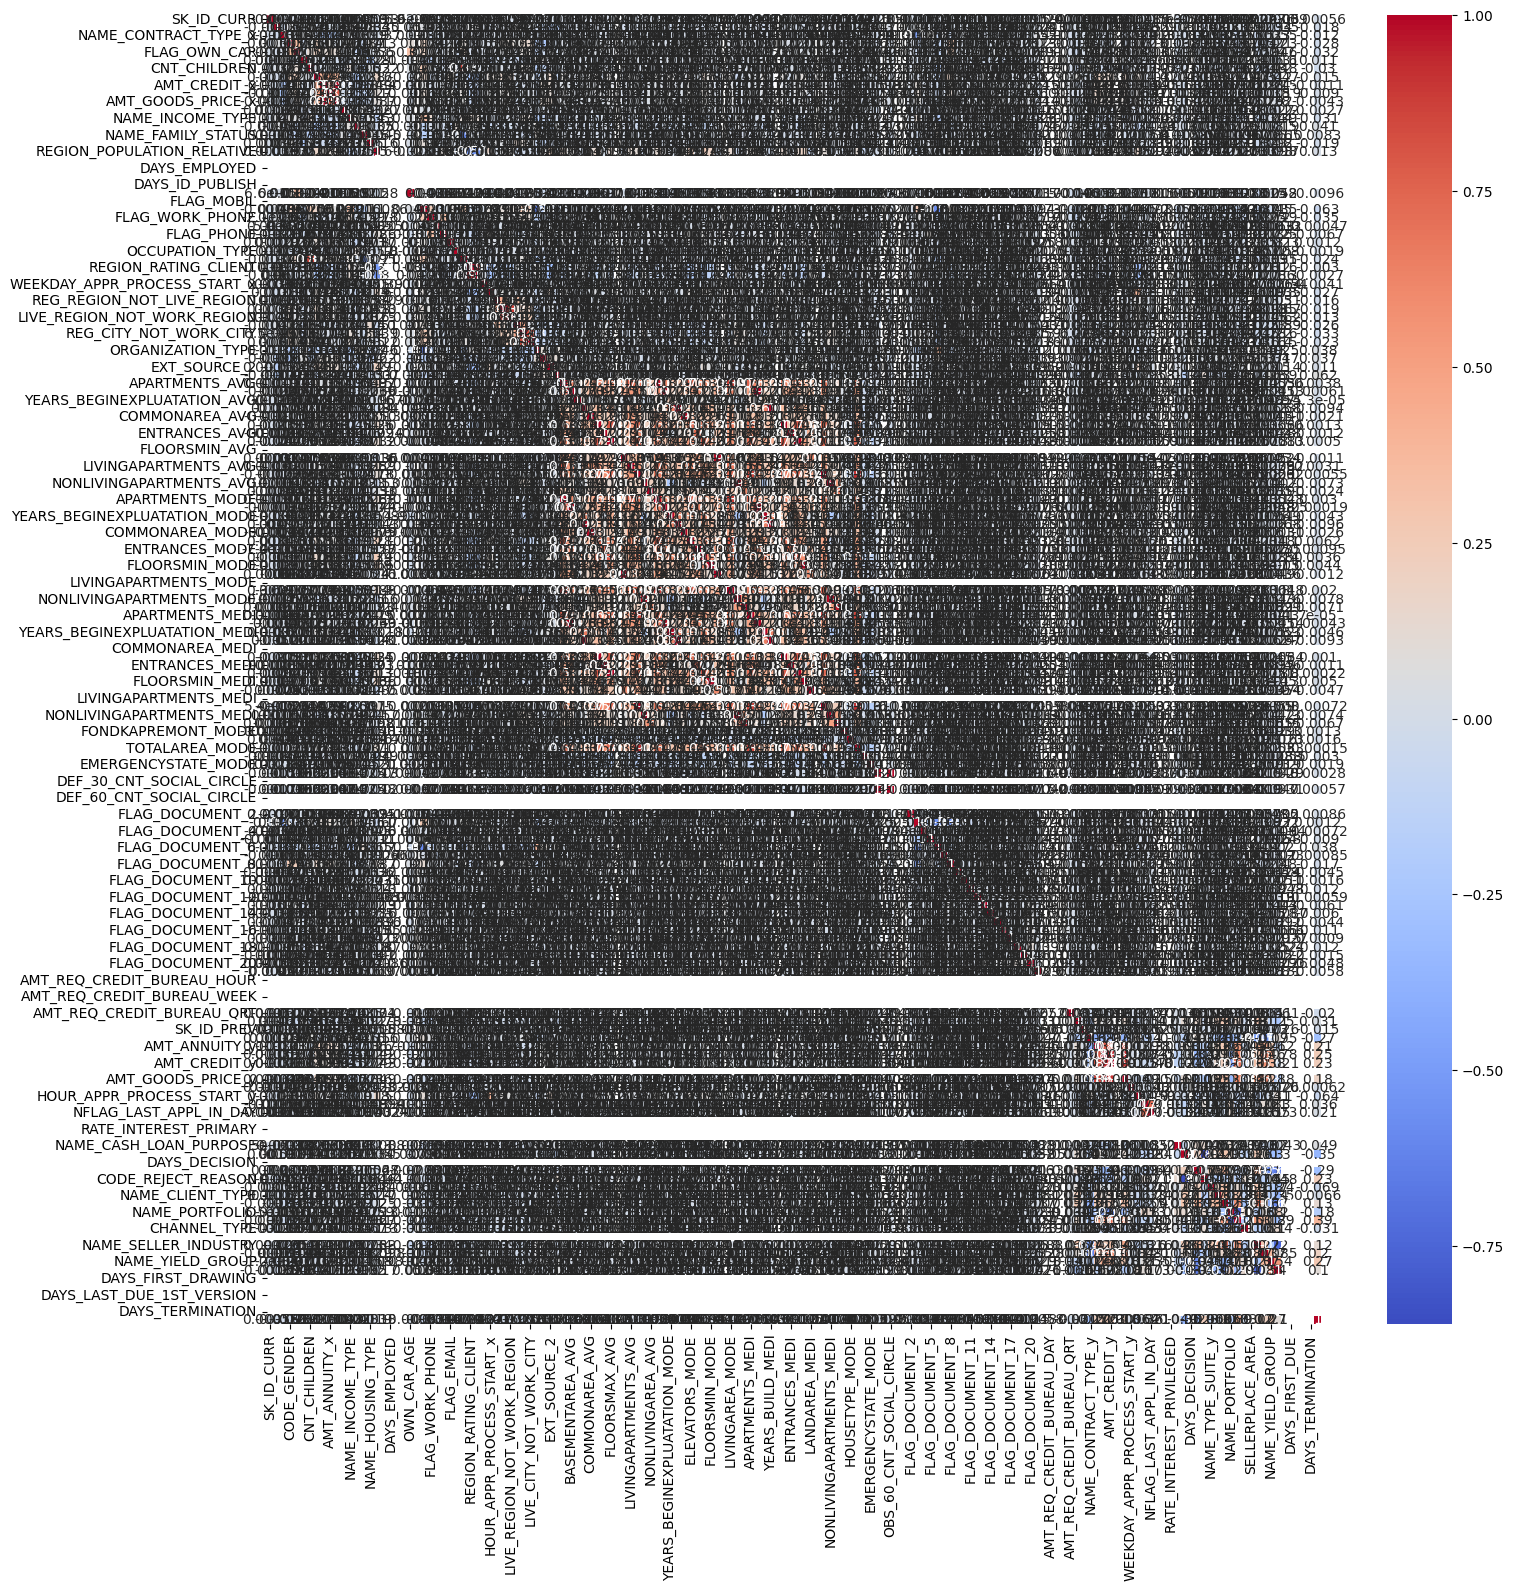

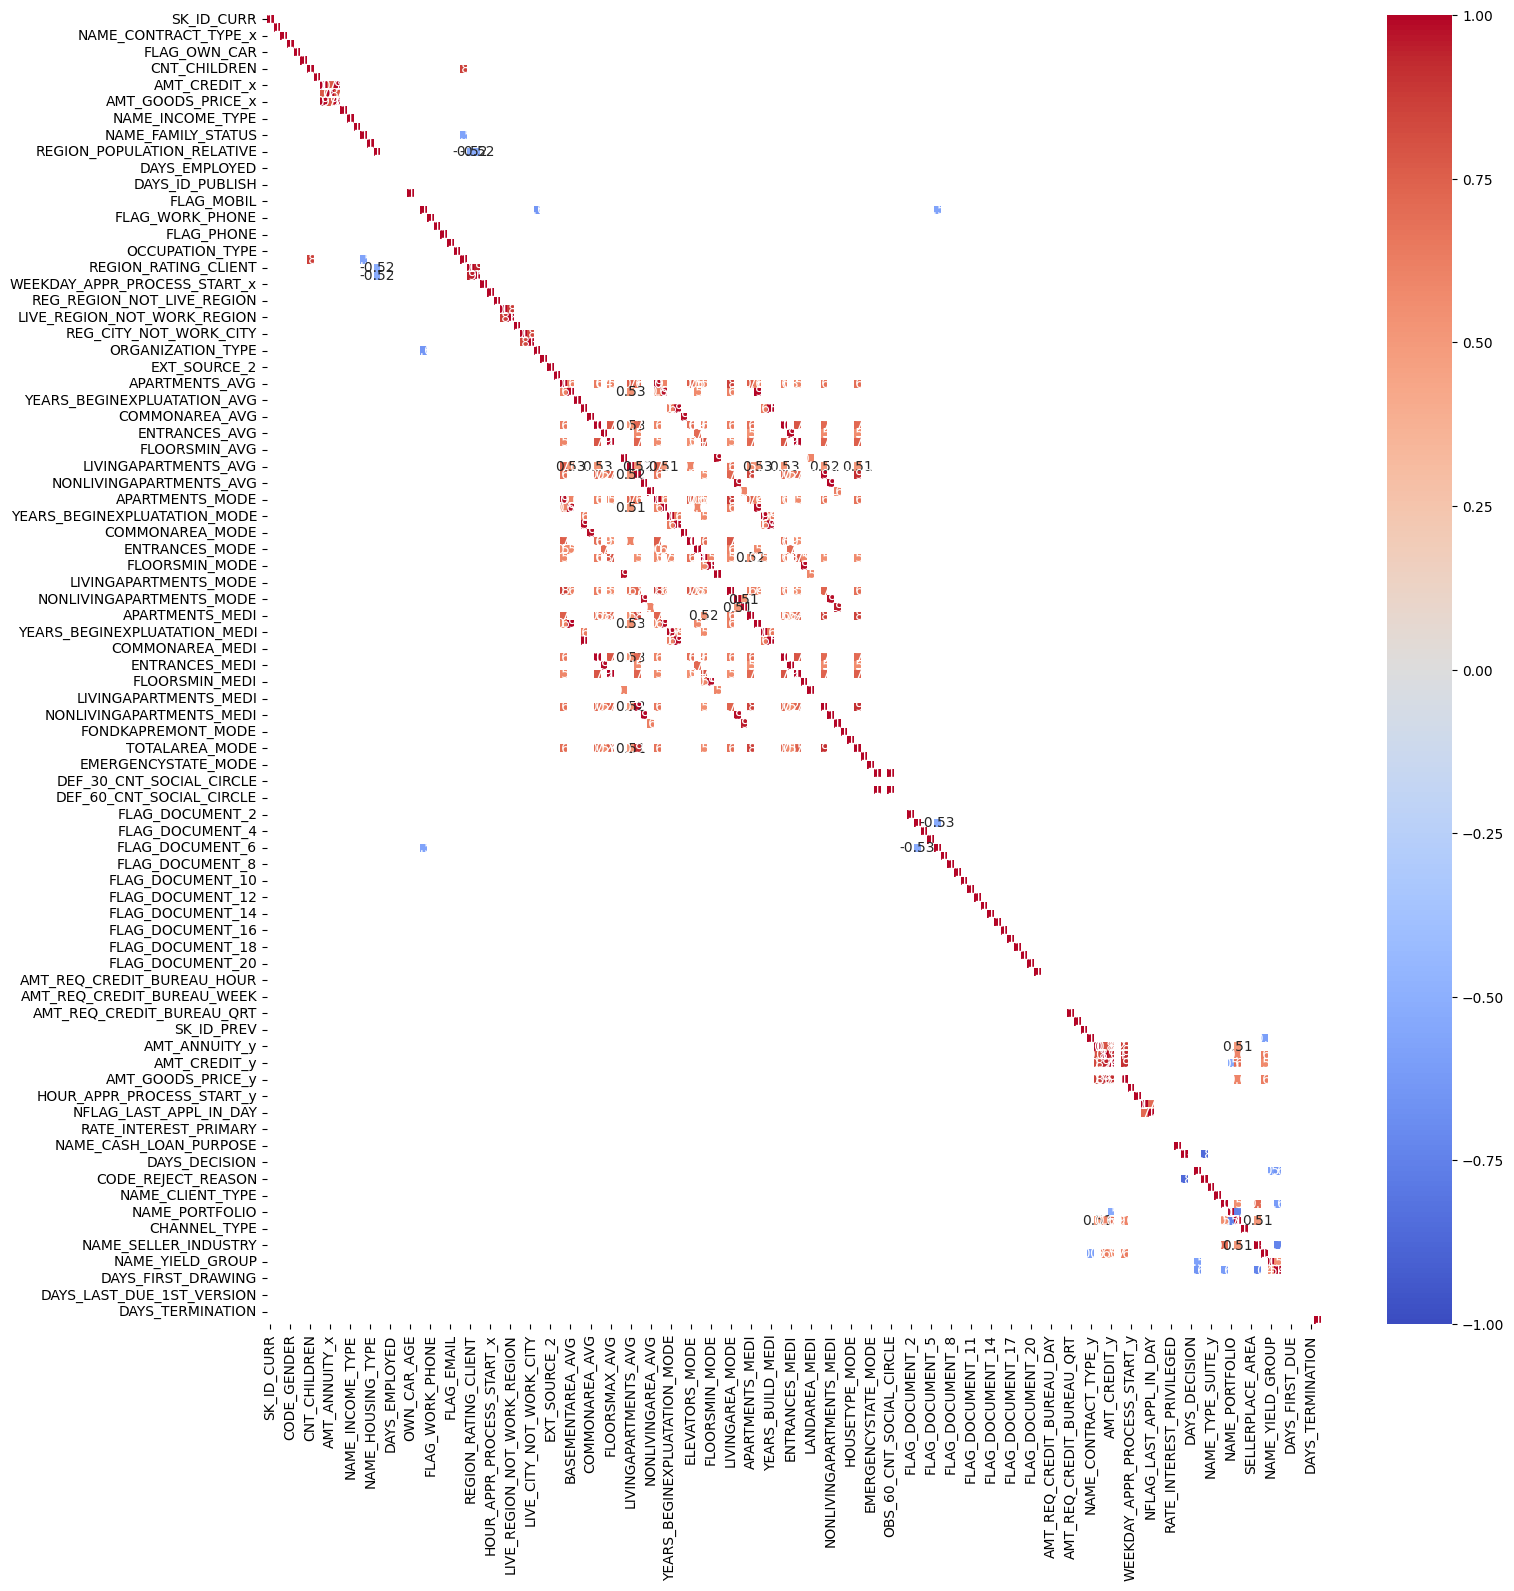

In [10]:
case_study1 = pd.pivot_table(f_data,index = ["CODE_GENDER"],values = ["AMT_INCOME_TOTAL","AMT_CREDIT_x","AMT_ANNUITY_x","AMT_GOODS_PRICE_x"],aggfunc="mean").round(2).reset_index()

case_study1

fig , axes = plt.subplots(ncols=2,nrows = 2,figsize = (16,7))
sns.barplot(data = case_study1,x = 'CODE_GENDER',y = "AMT_ANNUITY_x",ax=axes[0][0])
sns.barplot(data = case_study1,x = 'CODE_GENDER',y = "AMT_CREDIT_x",ax = axes[0][1])
sns.barplot(data = case_study1,x = 'CODE_GENDER',y = "AMT_GOODS_PRICE_x",ax = axes[1][0])
sns.barplot(data = case_study1,x = 'CODE_GENDER',y = "AMT_INCOME_TOTAL",ax = axes[1][1])
plt.show()
print(f"RESULT SHOWING GENDER 1.0 WHICH IS MALE HAS HIGHER DOMINATION IN AMT")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
f_data.columns

case_study2 = f_data.groupby(["PRODUCT_COMBINATION"]).agg({"PRODUCT_COMBINATION":"count"}).rename({"PRODUCT_COMBINATION":"PRC"},axis = 1).reset_index()

case_study2["PRODUCT_COMBINATION"] = case_study2["PRODUCT_COMBINATION"].map(product_combination_dictionary)

plt.figure(figsize=(37,17))
sns.barplot(data = case_study2,x = "PRODUCT_COMBINATION",y="PRC")
plt.show()

plt.figure(figsize = (17,17))
sns.heatmap(f_data.corr(),annot=True,cmap="coolwarm")
plt.show()

import numpy as np
corr_matrix = f_data.corr()
mask = np.abs(corr_matrix) < 0.5  # Replace 0.5 with your threshold
filtered_corr = corr_matrix.mask(mask)

plt.figure(figsize=(17, 17))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.show()

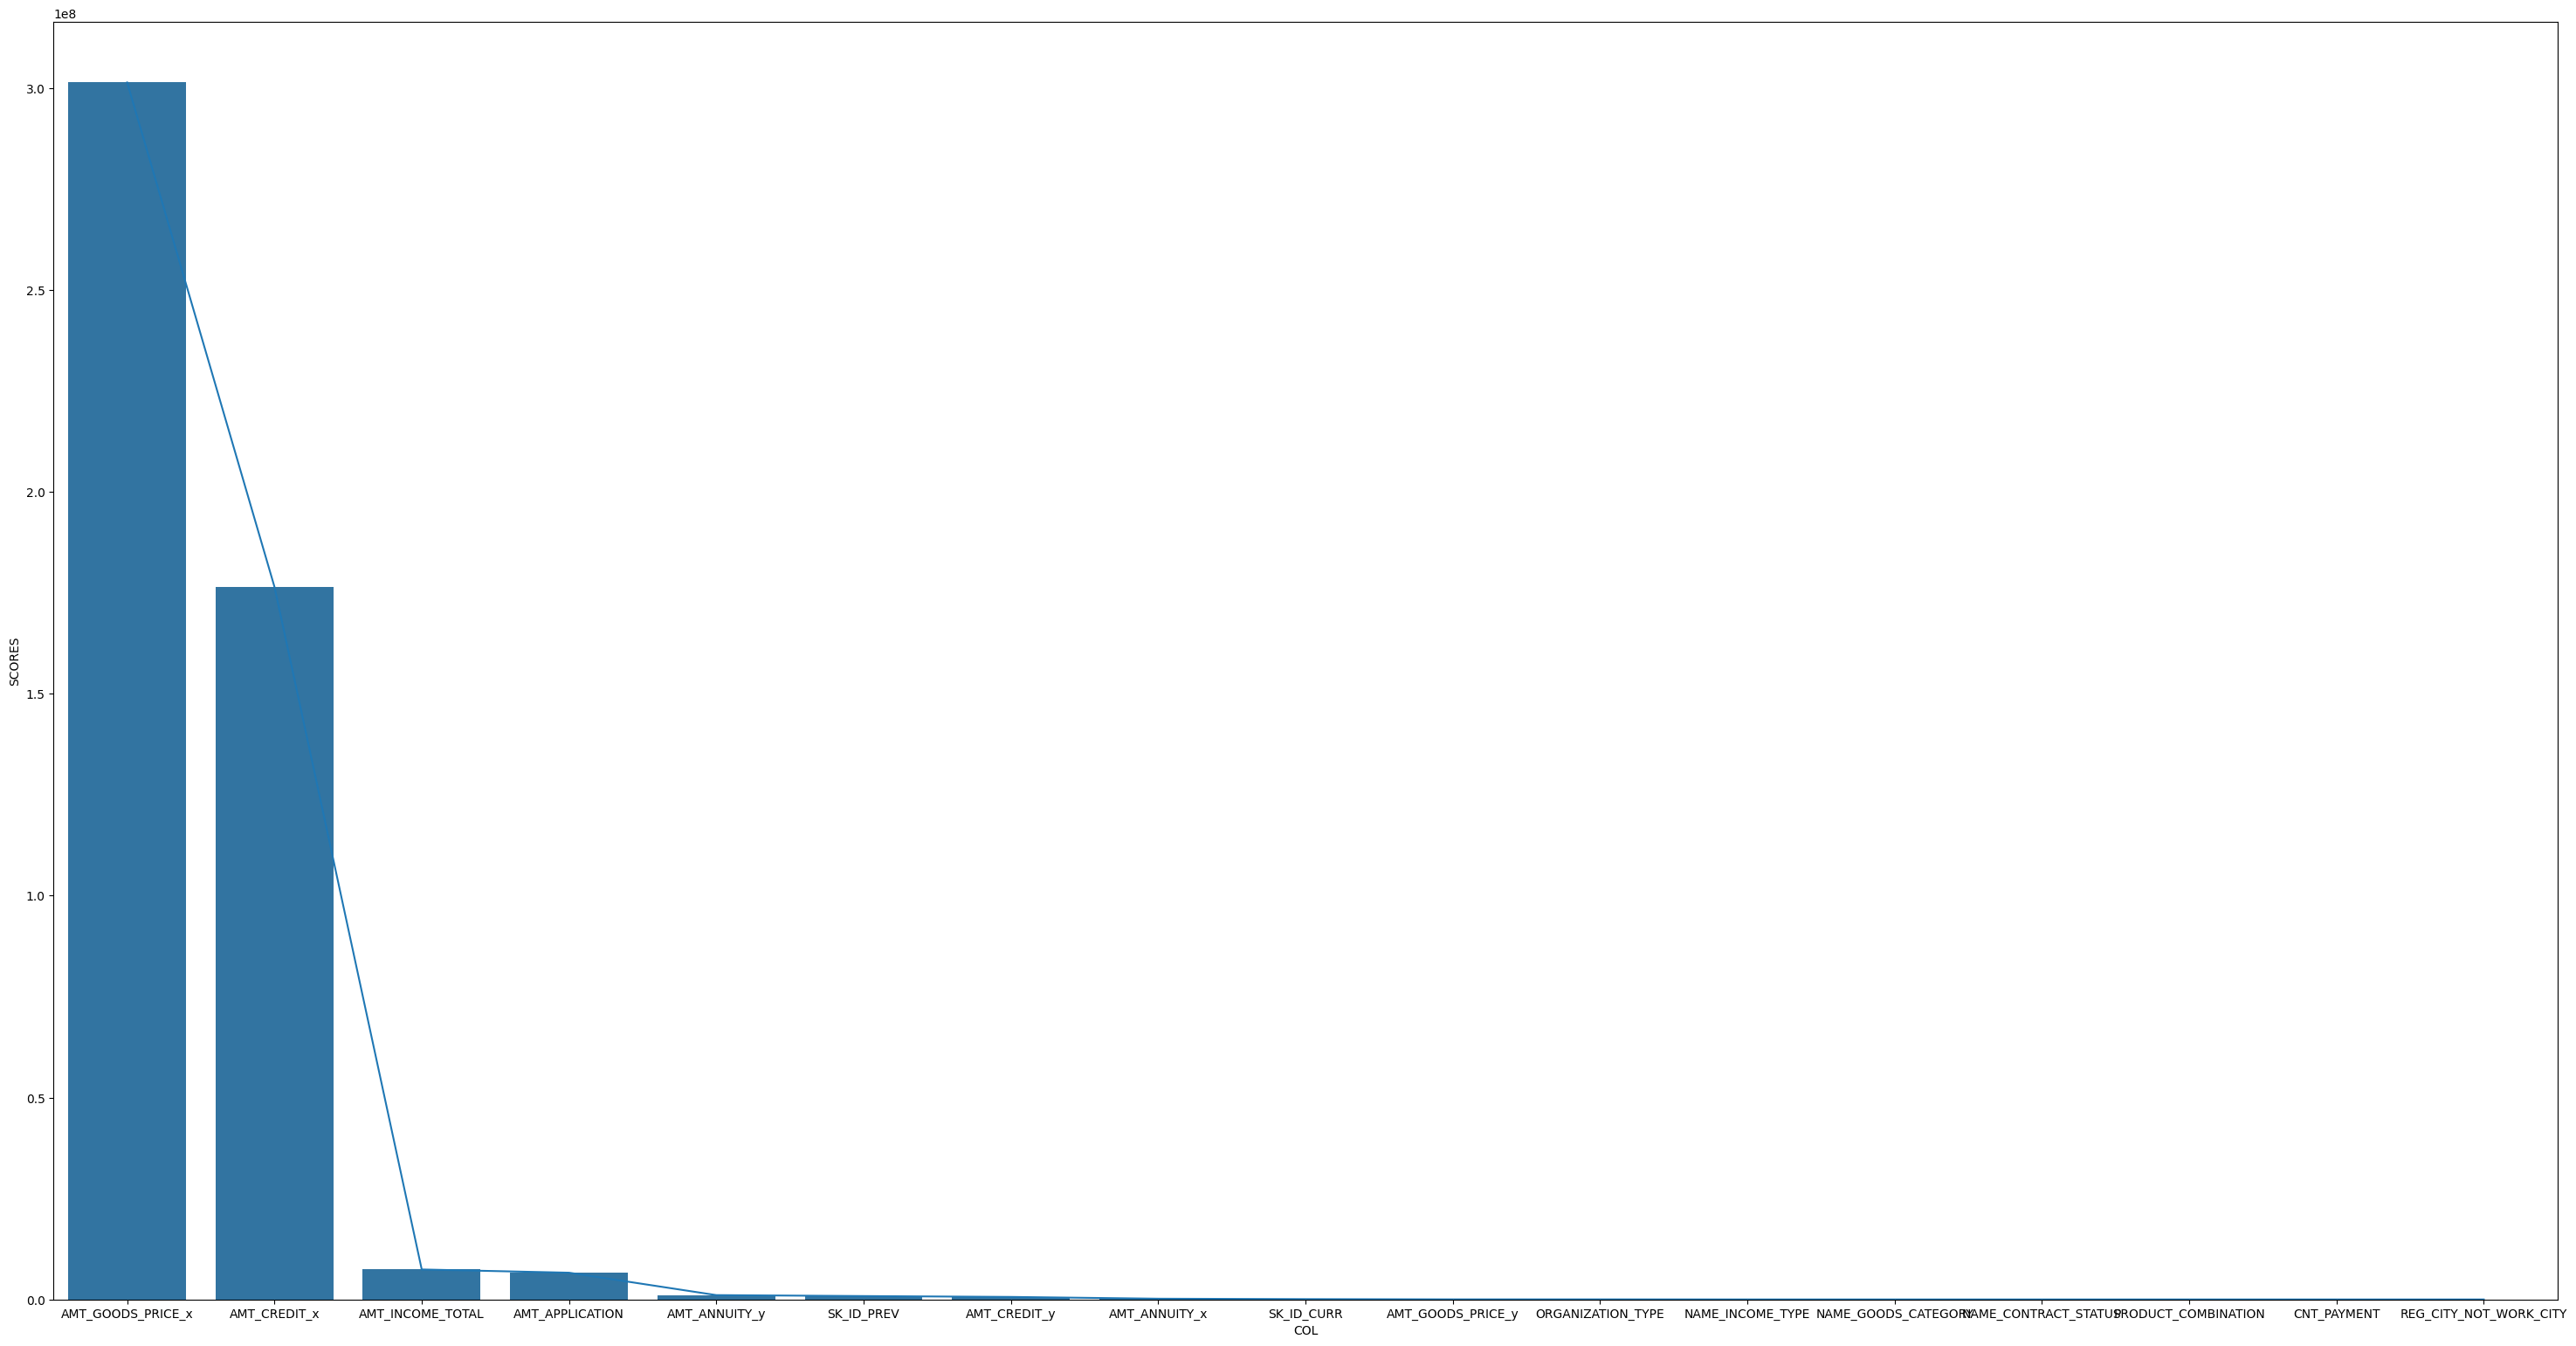

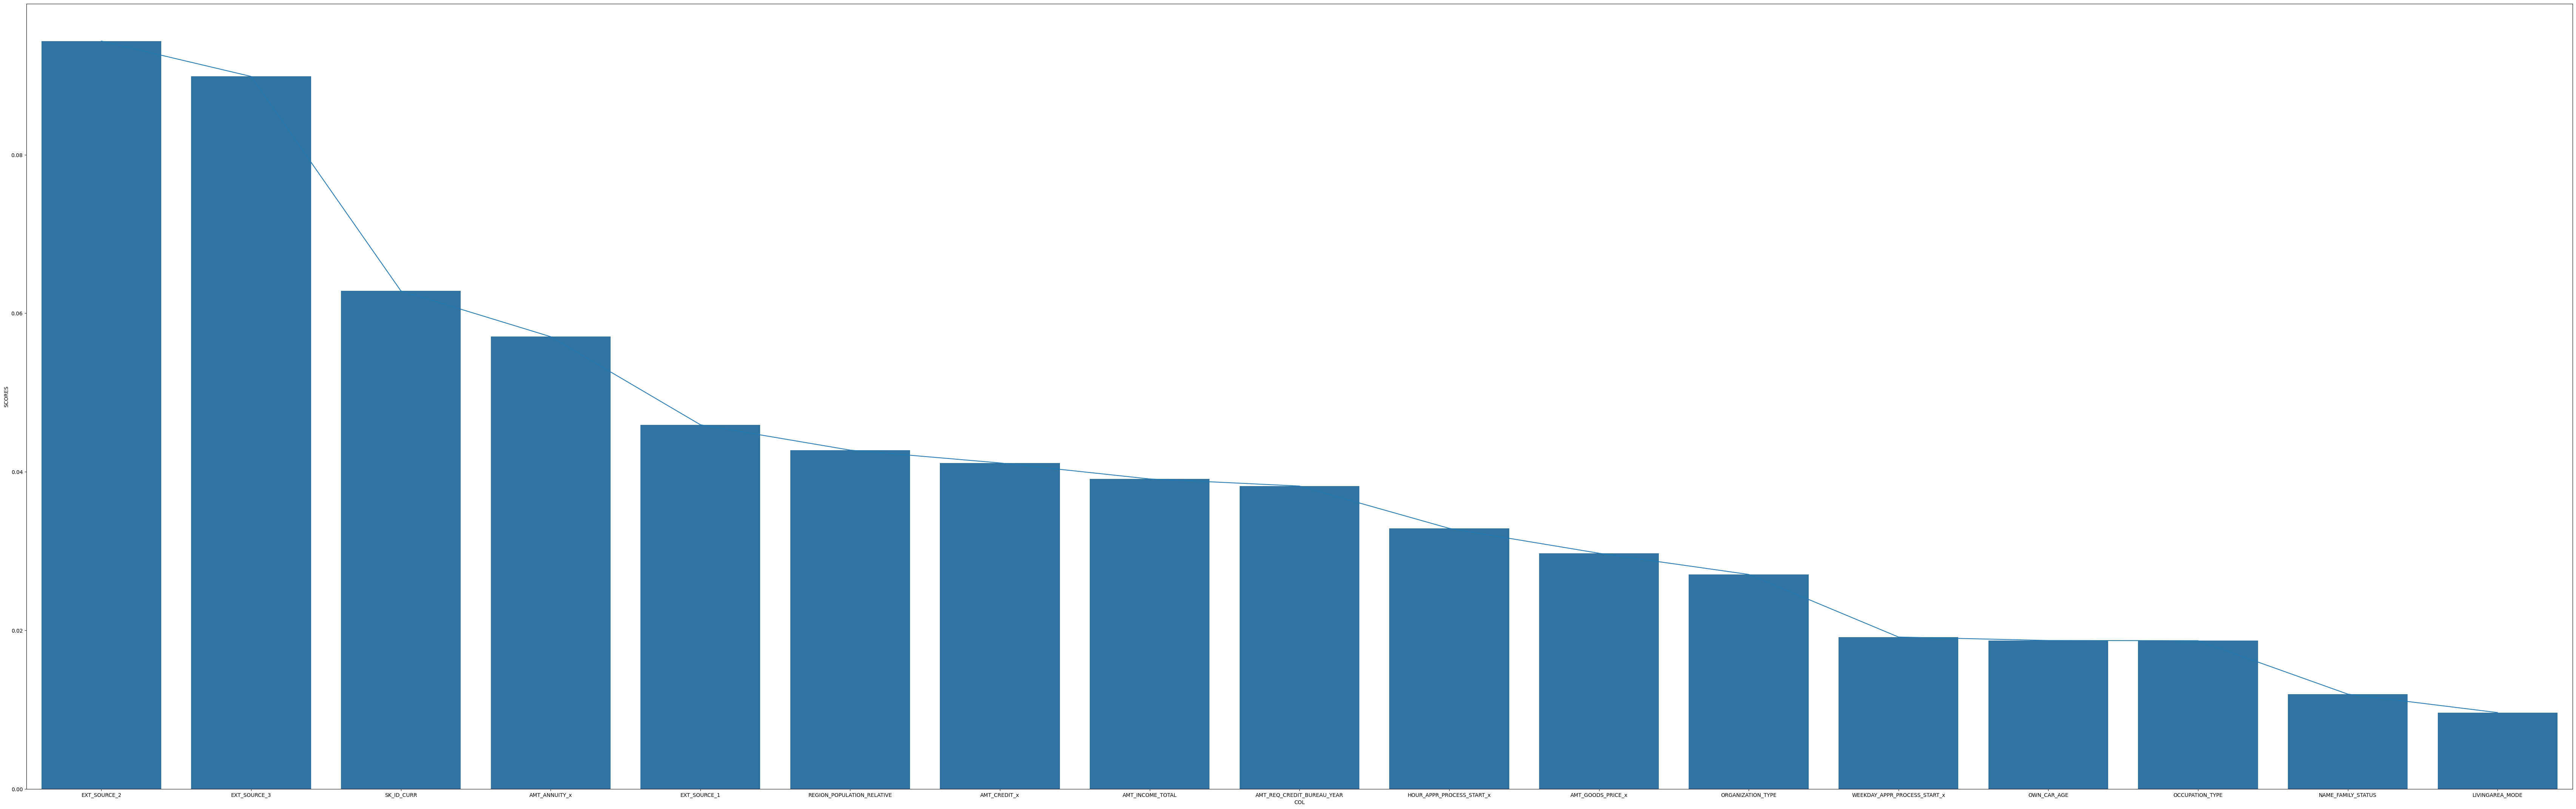

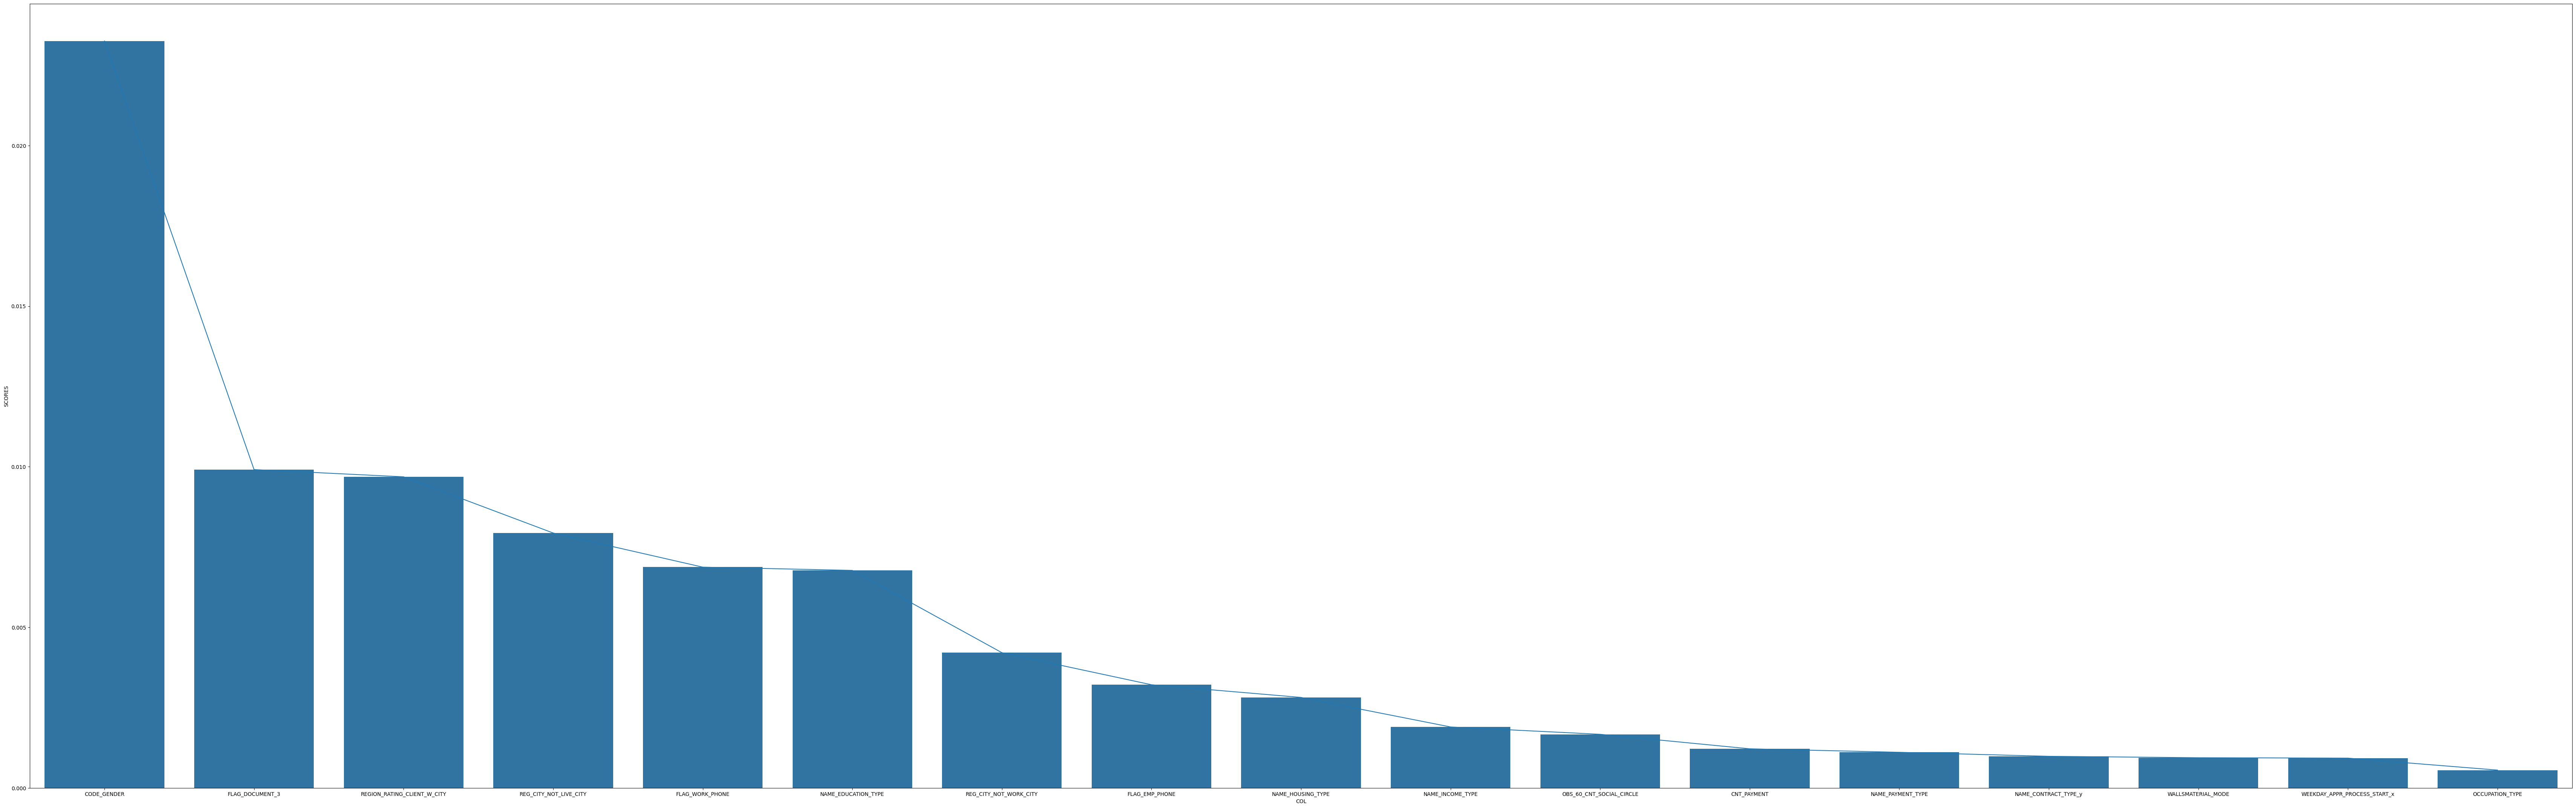

In [11]:
from sklearn.model_selection import train_test_split

X = f_data.drop(columns="TARGET")
Y = f_data["TARGET"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=45)

# FEATURE IMPORTANCES USING DIFFERENT METHODS

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

SK_Best = SelectKBest(score_func=chi2,k = 15)

SK_Best.fit(X,Y)

Best1 = pd.DataFrame({"COL":X.columns,"SCORES":SK_Best.scores_}).sort_values(by = "SCORES",ascending = False).dropna().head(17)

plt.figure(figsize = (37,19))
sns.lineplot(Best1,x = "COL",y = "SCORES")
sns.barplot(Best1,x = "COL",y = "SCORES")
plt.show()

# USING PCA FOR DIMENSIONALITY REDUCTION

from sklearn.decomposition import PCA

pca = PCA(n_components= 10)

pca.fit(X)

X_pca = pca.fit_transform(X)

from sklearn.tree import DecisionTreeClassifier

dt_tree = DecisionTreeClassifier(criterion="entropy")

dt_tree.fit(X,Y)

Best2 = pd.DataFrame({"COL":X.columns,"SCORES":dt_tree.feature_importances_}).sort_values(by = "SCORES",ascending = False).head(17)

plt.figure(figsize = (87,27))
sns.lineplot(Best2,x = "COL",y = "SCORES")
sns.barplot(Best2,x = "COL",y = "SCORES")
plt.show()

Best2

from sklearn.linear_model import ElasticNet

EN = ElasticNet(alpha=0.001,random_state=45)

EN.fit(X,Y)

Best3 = pd.DataFrame({"COL":X.columns,"SCORES":EN.coef_}).sort_values(by = "SCORES",ascending = False).head(17)

plt.figure(figsize = (87,27))
sns.lineplot(Best3,x = "COL",y = "SCORES")
sns.barplot(Best3,x = "COL",y = "SCORES")
plt.show()

B1_l = Best1["COL"].to_list()
B2_l = Best2["COL"].to_list()
B3_l = Best3["COL"].to_list()

Best = B1_l+B2_l+B3_l

Best_features_overall = list(set(Best))

# sns.heatmap(X[Best_features_overall].corr()[X[Best_features_overall].corr() > 0.5])

# for i in range(len(Best_features_overall)):
#     corr_ = pd.DataFrame({"COL":X[Best_features_overall[i]],"Y":Y}).corr()
#     plt.figure(figsize = (2,1))
#     sns.heatmap(corr_)
#     plt.show()
#     print(f"__{Best_features_overall[i]}__ \n \n{corr_} \n")

# for i in range(len(X.columns)):
#     corr_1 = pd.DataFrame({X.columns[i]:X[X.columns[i]],"Target":Y}).corr()
#     correlation_value = corr_1.loc[X.columns[i], "Target"]
#     if abs(correlation_value) > 0.5:
#         print(f"_____________CORR OF {X.columns[i]}_________ \n \n{corr_1} \n_________________________________________________ \n")
#     else:
#         print(f"_____________CORR OF {X.columns[i]}_________ \n \n{corr_1} \n_________________________________________________ \n")

In [12]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

scaling_list = [
"AMT_INCOME_TOTAL",
"AMT_CREDIT_x",
"AMT_ANNUITY_x",
"AMT_GOODS_PRICE_x",
"AMT_ANNUITY_y",
"AMT_APPLICATION",
"AMT_CREDIT_y",
"AMT_GOODS_PRICE_y"]

SS.fit(X[scaling_list],Y)

X[scaling_list] = SS.fit_transform(X[scaling_list])

X_B1 = X[Best1["COL"]]

X_train_B1,X_test_B1,Y_train_B1,Y_test_B1 = train_test_split(X_B1,Y,test_size=0.3,random_state=45)

In [13]:
# from sklearn.preprocessing import StandardScaler

# SS = StandardScaler()

# scaling_list = [
# "AMT_INCOME_TOTAL",
# "AMT_CREDIT_x",
# "AMT_ANNUITY_x",
# "AMT_GOODS_PRICE_x",
# "AMT_ANNUITY_y",
# "AMT_APPLICATION",
# "AMT_CREDIT_y",
# "AMT_GOODS_PRICE_y"]

# SS.fit(X[scaling_list],Y)

# X[scaling_list] = SS.fit_transform(X[scaling_list])

# X_B1 = X[Best1["COL"]]

# X_train_B1,X_test_B1,Y_train_B1,Y_test_B1 = train_test_split(X_B1,Y,test_size=0.3,random_state=45)

# BUILDING MODEL AND TRAINING

from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve

dt_model_f = DecisionTreeClassifier(criterion="entropy")

In [12]:
dt_model_f.fit(X_train_B1,Y_train_B1)

pred_train_b1 = dt_model_f.predict(X_train_B1)

pred_test_b1 = dt_model_f.predict(X_test_B1)

print(classification_report(Y_train_B1,pred_train_b1))

print(classification_report(Y_test_B1,pred_test_b1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    903966
           1       1.00      1.00      1.00     85624

    accuracy                           1.00    989590
   macro avg       1.00      1.00      1.00    989590
weighted avg       1.00      1.00      1.00    989590

              precision    recall  f1-score   support

           0       0.96      0.96      0.96    387375
           1       0.58      0.60      0.59     36736

    accuracy                           0.93    424111
   macro avg       0.77      0.78      0.77    424111
weighted avg       0.93      0.93      0.93    424111



              precision    recall  f1-score   support

           0       1.00      1.00      1.00    902742
           1       1.00      1.00      1.00    905135

    accuracy                           1.00   1807877
   macro avg       1.00      1.00      1.00   1807877
weighted avg       1.00      1.00      1.00   1807877

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    388599
           1       0.99      0.98      0.99    386206

    accuracy                           0.99    774805
   macro avg       0.99      0.99      0.99    774805
weighted avg       0.99      0.99      0.99    774805



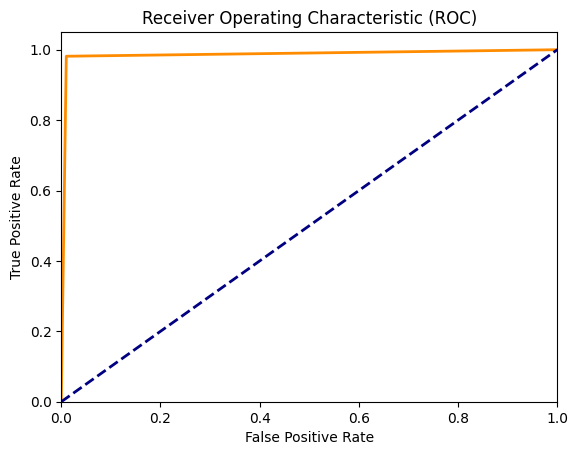

0.985703390312665

In [19]:
from imblearn.over_sampling import SMOTE

Smote_s = SMOTE()

X_best = X[Best2["COL"]]

Smote_s.fit(X_best,Y)

resampled_x,resampled_y = Smote_s.fit_resample(X_best,Y)

X_train_s2,X_test_s2,Y_train_s2,Y_test_s2 = train_test_split(resampled_x,resampled_y,test_size=0.3,random_state=45)

dt_model_c = DecisionTreeClassifier(criterion="entropy")

dt_model_c.fit(X_train_s2,Y_train_s2)

pred_train_s2 = dt_model_c.predict(X_train_s2)

pred_test_s2 = dt_model_c.predict(X_test_s2)

print(classification_report(Y_train_s2,pred_train_s2))

print(classification_report(Y_test_s2,pred_test_s2))

fpr, tpr, thresholds = roc_curve(Y_test_s2, pred_test_s2)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.show()

roc_auc_ = auc(fpr,tpr)

roc_auc_

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    902742
           1       1.00      1.00      1.00    905135

    accuracy                           1.00   1807877
   macro avg       1.00      1.00      1.00   1807877
weighted avg       1.00      1.00      1.00   1807877

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    388599
           1       0.99      0.98      0.99    386206

    accuracy                           0.99    774805
   macro avg       0.99      0.99      0.99    774805
weighted avg       0.99      0.99      0.99    774805



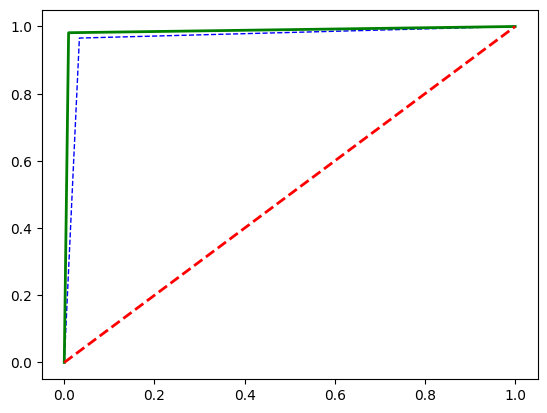

In [22]:
B2_X = X[Best2['COL'].to_list()]
B2_Y = Y

Smote_s.fit(B2_X,B2_Y)

XB2_resampled,YB2_resampled = Smote_s.fit_resample(B2_X,B2_Y)

XB2_train,XB2_test,YB2_train,YB2_test = train_test_split(XB2_resampled,YB2_resampled,random_state=45,test_size=0.3)

dt_model_f.fit(XB2_train,YB2_train)

train_XB2_pred = dt_model_f.predict(XB2_train)

test_XB2_pred = dt_model_f.predict(XB2_test)

print(classification_report(YB2_train,train_XB2_pred))

print(classification_report(YB2_test,test_XB2_pred))

fpr_b2,tpr_b2,thresholds_b2 = roc_curve(YB2_test,test_XB2_pred)

B2_auc = auc(fpr,tpr)

plt.plot(fpr,tpr,color = "Blue",lw = 1,linestyle = "--")
plt.plot(fpr_b2,tpr_b2,color = "green",lw = 2)
plt.plot([0,1],[0,1],color = "red",lw = 2,linestyle = "--")

In [23]:
with open("/Users/shanthakumark/Desktop/Sharing/Final_project/pickle_files/model_built_vs.pkl","wb") as model_:
    pickle.dump(dt_model_f,model_)

In [26]:
Best3

COL    SCORES
2                     CODE_GENDER  0.023255
96                FLAG_DOCUMENT_3  0.009911
30    REGION_RATING_CLIENT_W_CITY  0.009686
36         REG_CITY_NOT_LIVE_CITY  0.007937
23                FLAG_WORK_PHONE  0.006874
12            NAME_EDUCATION_TYPE  0.006772
37         REG_CITY_NOT_WORK_CITY  0.004211
22                 FLAG_EMP_PHONE  0.003212
14              NAME_HOUSING_TYPE  0.002818
11               NAME_INCOME_TYPE  0.001898
92       OBS_60_CNT_SOCIAL_CIRCLE  0.001669
148                   CNT_PAYMENT  0.001218
138             NAME_PAYMENT_TYPE  0.001109
122          NAME_CONTRACT_TYPE_y  0.000984
88             WALLSMATERIAL_MODE  0.000940
31   WEEKDAY_APPR_PROCESS_START_x  0.000928
27                OCCUPATION_TYPE  0.000555

In [36]:
import pickle

with open(f"/Users/shanthakumark/Desktop/Sharing/Final_project/pickle_files/Best1.pkl", 'wb') as best_:
        pickle.dump(Best1, best_)

with open(f"/Users/shanthakumark/Desktop/Sharing/Final_project/pickle_files/Best2.pkl", 'wb') as best_:
        pickle.dump(Best2, best_)

with open(f"/Users/shanthakumark/Desktop/Sharing/Final_project/pickle_files/Best3.pkl", 'wb') as best_:
        pickle.dump(Best3, best_)

In [37]:
with open("/Users/shanthakumark/Desktop/Sharing/Final_project/pickle_files/Best1.pkl","rb") as best1_:
    Best_1_loaded = pickle.load(best1_)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE_x  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0.0          1.0           0.0   
1      100003       0                   0.0          0.0           0.0   
2      100003       0                   0.0          0.0           0.0   
3      100003       0                   0.0          0.0           0.0   
4      100004       0                   1.0          1.0           1.0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0              1.0             0          202500.0      406597.5   
1              0.0             0          270000.0     1293502.5   
2              0.0             0          270000.0     1293502.5   
3              0.0             0          270000.0     1293502.5   
4              1.0             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x  NAME_TYPE_SUITE_x  NAME_INCOME_TYPE  \
0        24700.5           351000.0                6.0               6.0   
1        35698.5          1129500.0                1.0               3.0   
2        35698.5          1129500.0                1.0               3.0   
3        35698.5          1129500.0                1.0               3.0   
4         6750.0           135000.0                6.0               6.0   

   NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0                  4.0                 3.0                1.0   
1                  1.0                 1.0                1.0   
2                  1.0                 1.0                1.0   
3                  1.0                 1.0                1.0   
4                  4.0                 3.0                1.0   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801         0.0            0.0                0.0   
1                    0.003541         0.0            0.0                0.0   
2                    0.003541         0.0            0.0                0.0   
3                    0.003541         0.0            0.0                0.0   
4                    0.010032         0.0            0.0                0.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0              0.0          7.0           1               1                0   
1              0.0          7.0           1               1                0   
2              0.0          7.0           1               1                0   
3              0.0          7.0           1               1                0   
4              0.0         26.0           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0              8.0              1.0   
1                 1           1           0              3.0              2.0   
2                 1           1           0              3.0              2.0   
3                 1           1           0              3.0              2.0   
4                 1           1           0              8.0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

   WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                           6.0                         10   
1                           1.0                         11   
2                           1.0                         11   
3                           1.0                         11   
4                           1.0                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                         

In [43]:
X[Best1["COL"]].head()

AMT_GOODS_PRICE_x  AMT_CREDIT_x  AMT_INCOME_TOTAL  AMT_APPLICATION  \
0          -0.512453     -0.476573          0.458885         0.378281   
1           1.846294      1.916934          1.370828         2.105162   
2           1.846294      1.916934          1.370828         1.512113   
3           1.846294      1.916934          1.370828        -0.410636   
4          -1.166903     -1.209538         -1.365002        -0.729275   

   AMT_ANNUITY_y  SK_ID_PREV  AMT_CREDIT_y  AMT_ANNUITY_x  SK_ID_CURR  \
0      -0.487913     1038818      0.193526      -0.158141      100002   
1       2.118907     1810518      2.150034       0.689650      100003   
2       2.118907     2636178      1.221616       0.689650      100003   
3      -0.792657     2396755     -0.479417       0.689650      100003   
4      -0.959915     1564014     -0.770098      -1.541871      100004   

   AMT_GOODS_PRICE_y  ORGANIZATION_TYPE  NAME_INCOME_TYPE  \
0           0.353349                5.0               6.0   
1           1.986588               39.0               3.0   
2           1.863297               39.0               3.0   
3          -0.697267               39.0               3.0   
4          -1.121605               11.0               6.0   

   NAME_GOODS_CATEGORY  NAME_CONTRACT_STATUS  PRODUCT_COMBINATION  \
0                 24.0                   0.0                 15.0   
1                 26.0                   0.0                  7.0   
2                 11.0                   0.0                 11.0   
3                  7.0                   0.0                  9.0   
4                 18.0                   0.0                 14.0   

   CNT_PAYMENT  REG_CITY_NOT_WORK_CITY  
0         24.0                       0  
1         12.0                       0  
2          6.0                       0  
3         12.0                       0  
4          4.0                       0

In [44]:
f_data[Best1["COL"]].head()

AMT_GOODS_PRICE_x  AMT_CREDIT_x  AMT_INCOME_TOTAL  AMT_APPLICATION  \
0           351000.0      406597.5          202500.0        179055.00   
1          1129500.0     1293502.5          270000.0        420374.25   
2          1129500.0     1293502.5          270000.0        337500.00   
3          1129500.0     1293502.5          270000.0         68809.50   
4           135000.0      135000.0           67500.0         24282.00   

   AMT_ANNUITY_y  SK_ID_PREV  AMT_CREDIT_y  AMT_ANNUITY_x  SK_ID_CURR  \
0       9251.775     1038818     179055.00        24700.5      100002   
1      30760.830     1810518     501779.25        35698.5      100003   
2      30760.830     2636178     348637.50        35698.5      100003   
3       6737.310     2396755      68053.50        35698.5      100003   
4       5357.250     1564014      20106.00         6750.0      100004   

   AMT_GOODS_PRICE_y  ORGANIZATION_TYPE  NAME_INCOME_TYPE  \
0           179055.0                5.0               6.0   
1           350437.5               39.0               3.0   
2           337500.0               39.0               3.0   
3            68809.5               39.0               3.0   
4            24282.0               11.0               6.0   

   NAME_GOODS_CATEGORY  NAME_CONTRACT_STATUS  PRODUCT_COMBINATION  \
0                 24.0                   0.0                 15.0   
1                 26.0                   0.0                  7.0   
2                 11.0                   0.0                 11.0   
3                  7.0                   0.0                  9.0   
4                 18.0                   0.0                 14.0   

   CNT_PAYMENT  REG_CITY_NOT_WORK_CITY  
0         24.0                       0  
1         12.0                       0  
2          6.0                       0  
3         12.0                       0  
4          4.0                       0

In [45]:
df[Best1["COL"]].head()

AMT_GOODS_PRICE_x  AMT_CREDIT_x  AMT_INCOME_TOTAL  AMT_APPLICATION  \
0           351000.0      406597.5          202500.0         179055.0   
1          1129500.0     1293502.5          270000.0         900000.0   
2          1129500.0     1293502.5          270000.0         337500.0   
3          1129500.0     1293502.5          270000.0          68809.5   
4           135000.0      135000.0           67500.0          24282.0   

   AMT_ANNUITY_y  SK_ID_PREV  AMT_CREDIT_y  AMT_ANNUITY_x  SK_ID_CURR  \
0       9251.775     1038818      179055.0        24700.5      100002   
1      98356.995     1810518     1035882.0        35698.5      100003   
2      64567.665     2636178      348637.5        35698.5      100003   
3       6737.310     2396755       68053.5        35698.5      100003   
4       5357.250     1564014       20106.0         6750.0      100004   

   AMT_GOODS_PRICE_y       ORGANIZATION_TYPE NAME_INCOME_TYPE  \
0           179055.0  Business Entity Type 3          Working   
1           900000.0                  School    State servant   
2           337500.0                  School    State servant   
3            68809.5                  School    State servant   
4            24282.0              Government          Working   

    NAME_GOODS_CATEGORY NAME_CONTRACT_STATUS          PRODUCT_COMBINATION  \
0              Vehicles             Approved      POS other with interest   
1                   XNA             Approved             Cash X-Sell: low   
2             Furniture             Approved   POS industry with interest   
3  Consumer Electronics             Approved  POS household with interest   
4                Mobile             Approved  POS mobile without interest   

   CNT_PAYMENT  REG_CITY_NOT_WORK_CITY  
0         24.0                       0  
1         12.0                       0  
2          6.0                       0  
3         12.0                       0  
4          4.0                       0

In [46]:
data[Best1["COL"]].head()

AMT_GOODS_PRICE_x  AMT_CREDIT_x  AMT_INCOME_TOTAL  AMT_APPLICATION  \
0           351000.0      406597.5          202500.0        179055.00   
1          1129500.0     1293502.5          270000.0        420374.25   
2          1129500.0     1293502.5          270000.0        337500.00   
3          1129500.0     1293502.5          270000.0         68809.50   
4           135000.0      135000.0           67500.0         24282.00   

   AMT_ANNUITY_y  SK_ID_PREV  AMT_CREDIT_y  AMT_ANNUITY_x  SK_ID_CURR  \
0       9251.775     1038818     179055.00        24700.5      100002   
1      30760.830     1810518     501779.25        35698.5      100003   
2      30760.830     2636178     348637.50        35698.5      100003   
3       6737.310     2396755      68053.50        35698.5      100003   
4       5357.250     1564014      20106.00         6750.0      100004   

   AMT_GOODS_PRICE_y  ORGANIZATION_TYPE  NAME_INCOME_TYPE  \
0           179055.0                5.0               6.0   
1           350437.5               39.0               3.0   
2           337500.0               39.0               3.0   
3            68809.5               39.0               3.0   
4            24282.0               11.0               6.0   

   NAME_GOODS_CATEGORY  NAME_CONTRACT_STATUS  PRODUCT_COMBINATION  \
0                 24.0                   0.0                 15.0   
1                 26.0                   0.0                  7.0   
2                 11.0                   0.0                 11.0   
3                  7.0                   0.0                  9.0   
4                 18.0                   0.0                 14.0   

   CNT_PAYMENT  REG_CITY_NOT_WORK_CITY  
0         24.0                       0  
1         12.0                       0  
2          6.0                       0  
3         12.0                       0  
4          4.0                       0

: 

In [1]:
pip install pypdf


  Using cached pypdf-4.3.1-py3-none-any.whl.metadata (7.4 kB)
Using cached pypdf-4.3.1-py3-none-any.whl (295 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
save_folder = "/Users/shanthakumark/Desktop/Sharing/Final_project/uploaded files"

os.listdir(save_folder)

['.DS_Store']

In [1]:
pip install sentence-transformers

  Using cached sentence_transformers-3.0.1-py3-none-any.whl.metadata (10 kB)
  Using cached transformers-4.44.2-py3-none-any.whl.metadata (43 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 367.5 kB/s eta 0:00:00a 0:00:01
  Using cached huggingface_hub-0.24.6-py3-none-any.whl.metadata (13 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.1 MB/s eta 0:00:00
Using cached sentence_transformers-3.0.1-py3-none-any.whl (227 kB)
Using cached huggingface_hub-0.24.6-py3-none-any.whl (417 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.9 MB/s eta 0:00:00
Using cached transformers-4.44.2-py3-none-any.whl (9.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 4.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.1/279.1 kB 4.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.8/381.8 kB 4.4 MB/s eta 0:00:00a

In [3]:
pip install faiss-gpu

ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install faiss-cpu


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install ctransformers

  Using cached ctransformers-0.2.27-py3-none-any.whl.metadata (17 kB)
Using cached ctransformers-0.2.27-py3-none-any.whl (9.9 MB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 1.9 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.0/297.0 kB 1.5 MB/s eta 0:00:00a 0:00:01m

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade openai


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 855.1 kB/s eta 0:00:00a 0:00:01
  Attempting uninstall: openai
    Found existing installation: openai 1.44.0
    Uninstalling openai-1.44.0:
      Successfully uninstalled openai-1.44.0

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install opencv-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 1.2 MB/s eta 0:00:0000:0100:02

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yolov5

  Using cached opencv_python-4.10.0.84-cp37-abi3-macosx_11_0_arm64.whl.metadata (20 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.0 MB/s eta 0:00:0000:01
  Using cached tensorboard-2.17.1-py3-none-any.whl.metadata (1.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 7.9 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 6.2 MB/s eta 0:00:0000:0100:01
Using cached tensorboard-2.17.1-py3-none-any.whl (5.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7

In [4]:
pip install yolov5



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install -r requirements.txt


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install torch torchvision



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install streamlit nltk matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pickle
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download and save the VADER lexicon and Sentiment Analyzer
nltk.download('vader_lexicon')

# # Initialize the SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()

# # Save the SentimentIntensityAnalyzer object as a pickle file
# with open('sentiment_analyzer.pkl', 'wb') as f:
#     pickle.dump(sia, f)

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [8]:
import urllib.request
import ssl

url = "https://example.com"
context = ssl._create_unverified_context()
response = urllib.request.urlopen(url, context=context)


In [9]:
import pickle
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download and save the VADER lexicon and Sentiment Analyzer
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Save the SentimentIntensityAnalyzer object as a pickle file
with open('sentiment_analyzer.pkl', 'wb') as f:
    pickle.dump(sia, f)


[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


In [13]:
import nltk
import streamlit as st
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pickle
import os

vader_lexicon_path = os.path.expanduser("/Users/shanthakumark/Downloads/vader_lexicon.txt")

@st.cache_resource
def load_sentiment_analyzer():
    try:
        nltk.data.find('sentiment/vader_lexicon')
    except LookupError:
        nltk.data.load(vader_lexicon_path)  # Loading from local file
    return SentimentIntensityAnalyzer()

# Analyze the sentiment of the text
def analyze_sentiment(text):
    sia = load_sentiment_analyzer()
    sentiment_scores = sia.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def main():
    st.title("Mobile Review Sentiment Analysis")

    # Input box for user review
    user_input = st.text_input("Enter your mobile review:")

    if user_input:
        sentiment = analyze_sentiment(user_input)
        st.write(f"The sentiment of the review is: **{sentiment}**")

if __name__ == '__main__':
    main()


2024-09-13 12:19:38.003 
  command:

    streamlit run /Users/shanthakumark/Library/Python/3.12/lib/python/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-09-13 12:19:38.004 Session state does not function when running a script without `streamlit run`
